# MLP with Keras

## Loading the packages

## The Dataset
The following script allows you to create a 2D dataset by using the mouse. The left click adds points belonging to class A (blue), and the right click adds points belonging to class B (red). You can create as many points as you desire. The final dataset will contain hence three values per point: x coordinate (-1 ≤ x ≤ 1), y coordinate (-1 ≤ y ≤ 1) and the class ∈ {1,-1}.

In [1]:
#!pip install ipympl

<font color="red">**For it to work on Colab, you will need to reload your session (Exécution -> redémarrer la session)**</font>

<font color="orange">**Make sure to put a large amount of points otherwise the cross validation folds will be really small**</font>

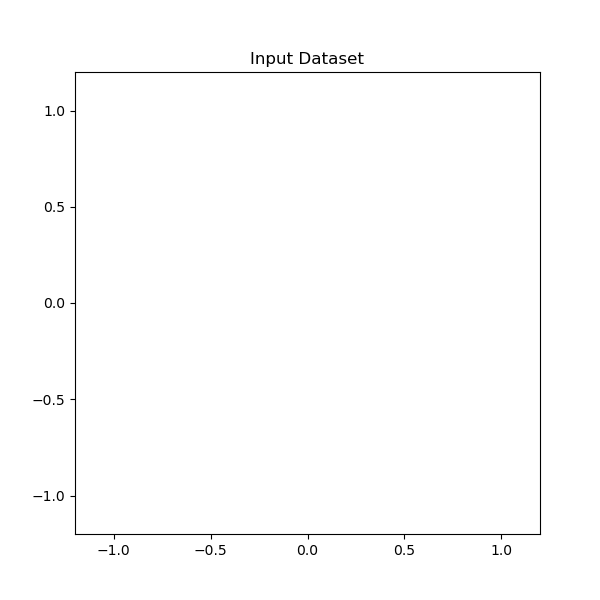

In [2]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as pl

fig = pl.figure(figsize=(6,6))
pl.title("Input Dataset")
pl.xlim((-1.2,1.2))
pl.ylim((-1.2,1.2))

dataset = []

def onclick(event):
    global dataset
    cx = event.xdata
    cy = event.ydata
    co = event.button
    dataset.append((cx, cy, co-2))

    pl.scatter(cx, cy, c=(['b', 'r'])[co > 2], s=100, lw=0)
    pl.grid(True)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [3]:
fig.canvas.mpl_disconnect(cid)

## Show the dataset

In [4]:
dataset = np.array(dataset)
dataset

array([[-0.56869174,  0.86062297, -1.        ],
       [-0.97127239,  1.04244115, -1.        ],
       [-0.0061111 ,  0.98010349, -1.        ],
       [-0.30546593,  0.43464894, -1.        ],
       [-0.36224013,  0.89698661, -1.        ],
       [-0.86288529,  0.63724635, -1.        ],
       [-0.12998206, -0.50041599,  1.        ],
       [ 0.00421148, -0.39651989,  1.        ],
       [ 0.13840503, -0.17833807,  1.        ],
       [ 0.43259858, -0.18872768,  1.        ],
       [ 0.23130826, -0.44327313,  1.        ]])

In [5]:
input_data = dataset[:,0:2]
output_data = dataset[:,2]

In [6]:
input_data

array([[-0.56869174,  0.86062297],
       [-0.97127239,  1.04244115],
       [-0.0061111 ,  0.98010349],
       [-0.30546593,  0.43464894],
       [-0.36224013,  0.89698661],
       [-0.86288529,  0.63724635],
       [-0.12998206, -0.50041599],
       [ 0.00421148, -0.39651989],
       [ 0.13840503, -0.17833807],
       [ 0.43259858, -0.18872768],
       [ 0.23130826, -0.44327313]])

In [7]:
output_data

array([-1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.])

In [8]:
%matplotlib inline

In [9]:
import keras
from keras import layers
from sklearn.model_selection import KFold

pl.clf()

keras.utils.set_random_seed(123)
kf = KFold(n_splits=3, shuffle=True)

for i, (train_index, test_index) in enumerate(kf.split(input_data)):
  pl.figure(figsize=(4,4))

  # Plot train data
  pl.scatter(input_data[train_index][:,0], input_data[train_index][:,1], c=[(['b', 'r'])[int(d>0)] for d in output_data[train_index]], s=100)
  pl.scatter(input_data[test_index][:,0], input_data[test_index][:,1], c=[(['gray', 'gray'])[int(d>0)] for d in output_data[test_index]], s=100)
  pl.title(f'Split {i + 1}, validation fold in gray.')
  pl.show()

ModuleNotFoundError: No module named 'keras'

In [11]:
def create_model():
  # 2 inputs
  # 2 hidden nodes
  # 1 output

  mlp = keras.Sequential([
      layers.Input(shape=(2,)),
      layers.Dense(2, activation="tanh"), # Try different numbers of hidden neurons here (e.g. 2, 4, 8, 32, 128)
      layers.Dense(1, activation="tanh"),
  ])

  # Experiment with hyperparameters here:
  # momentum: [0, 0.8, 0.9, 0.99]
  # learning_rate: [0.1, 0.01, 0.001, 0.0001]
  mlp.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.99),
      loss="mse",
  )

  return mlp

mlp = create_model()
mlp.summary()

2024-11-15 16:48:23.555395: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-11-15 16:48:23.555442: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-11-15 16:48:23.555453: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-11-15 16:48:23.555479: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-15 16:48:23.555498: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
history_list = []
trained_mlp = []

for i, (train_index, test_index) in enumerate(kf.split(input_data)):
  # We need to create a new model everytime otherwise fit will continue previous training
  mlp = create_model()

  history = mlp.fit(
      x=input_data[train_index], y=output_data[train_index],
      validation_data=(input_data[test_index], output_data[test_index]),
      epochs=400
  )

  history_list.append(history)
  trained_mlp.append(mlp)

Epoch 1/400


2024-11-15 16:48:26.594481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 1.0651 - val_loss: 0.9532
Epoch 2/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9115 - val_loss: 0.7779
Epoch 3/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7191 - val_loss: 0.5823
Epoch 4/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5334 - val_loss: 0.3420
Epoch 5/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3342 - val_loss: 0.1838
Epoch 6/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2437 - val_loss: 0.1344
Epoch 7/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2056 - val_loss: 0.1016
Epoch 8/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1526 - val_loss: 0.0955
Epoch 9/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1475 - val_loss: 0.0970
Epoch 10/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1441 - val_loss: 0.0766
Epoch 11/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1195 - val_loss: 0.0881
Epoch 12/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1145 - val_loss: 0.1149
Epoch 13/400

# Plot training history

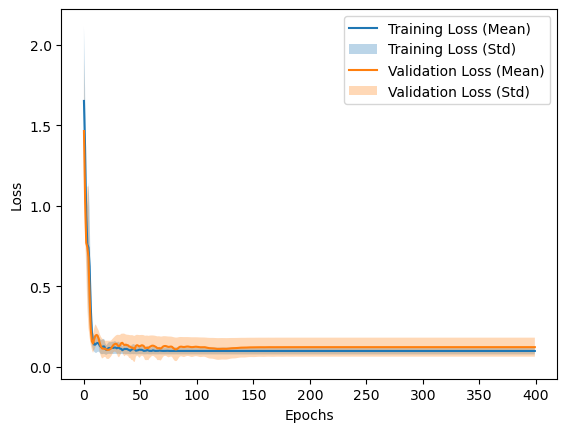

In [13]:
train_losses = np.array([history.history['loss'] for history in history_list])
val_losses = np.array([history.history['val_loss'] for history in history_list])

# Calculate mean and standard deviation for training and validation losses
mean_train_loss = np.mean(train_losses, axis=0)
std_train_loss = np.std(train_losses, axis=0)
mean_val_loss = np.mean(val_losses, axis=0)
std_val_loss = np.std(val_losses, axis=0)

# Plot mean and standard deviation for training loss
pl.plot(mean_train_loss, label='Training Loss (Mean)')
pl.fill_between(range(len(mean_train_loss)), mean_train_loss - std_train_loss, mean_train_loss + std_train_loss, alpha=0.3, label='Training Loss (Std)')

# Plot mean and standard deviation for validation loss
pl.plot(mean_val_loss, label='Validation Loss (Mean)')
pl.fill_between(range(len(mean_val_loss)), mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, alpha=0.3, label='Validation Loss (Std)')

# Add labels and legend
pl.xlabel('Epochs')
pl.ylabel('Loss')
pl.legend()

# Display the plot
pl.show()

# Plot models feature space outputs

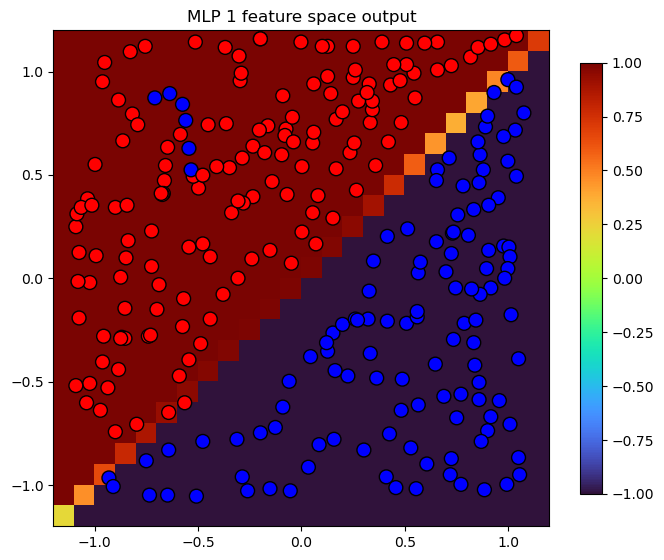

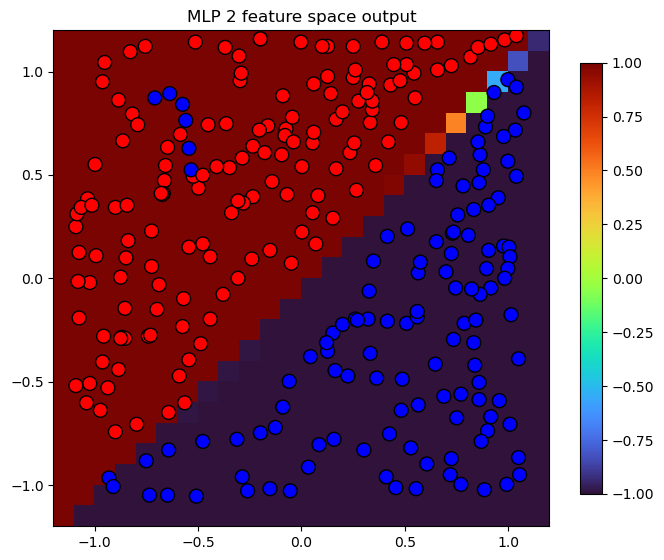

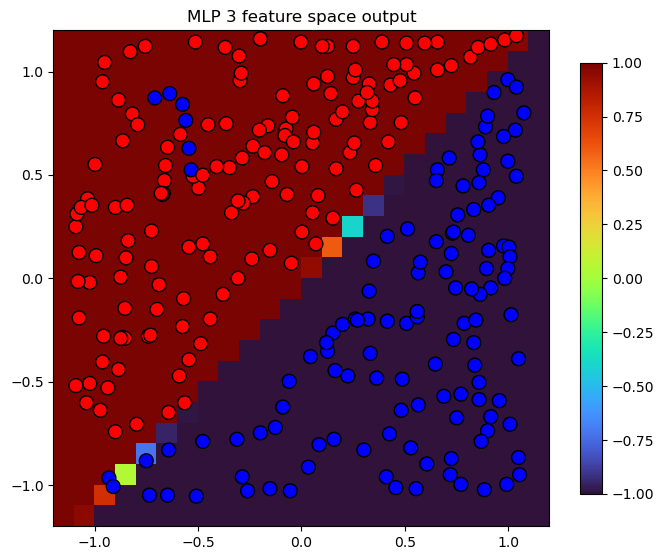

In [14]:
for idx, model in enumerate(trained_mlp):
    # Plot model's output in the feature space
    input_x = np.arange(-1.2, 1.2, 0.1)
    input_y = np.arange(-1.2, 1.2, 0.1)
    input_x_matrix, input_y_matrix = np.meshgrid(input_x, input_y)
    inputs_xy = np.concatenate((input_x_matrix.flatten()[:,np.newaxis], input_y_matrix.flatten()[:,np.newaxis]), axis=1)

    output_values = model(inputs_xy)
    output_matrix = np.reshape(output_values, input_x_matrix.shape)

    pl.figure(figsize=(8,8))
    img = pl.imshow(np.flipud(output_matrix), interpolation='None', extent=(-1.2,1.2,-1.2,1.2), cmap="turbo")
    pl.colorbar(img, shrink=0.7)
    pl.scatter(input_data[:,0], input_data[:,1], c=[(['b', 'r'])[int(d>0)] for d in output_data], s=100, edgecolors='black')
    pl.title(f'MLP {idx+1} feature space output')
    pl.show()

# Performances

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


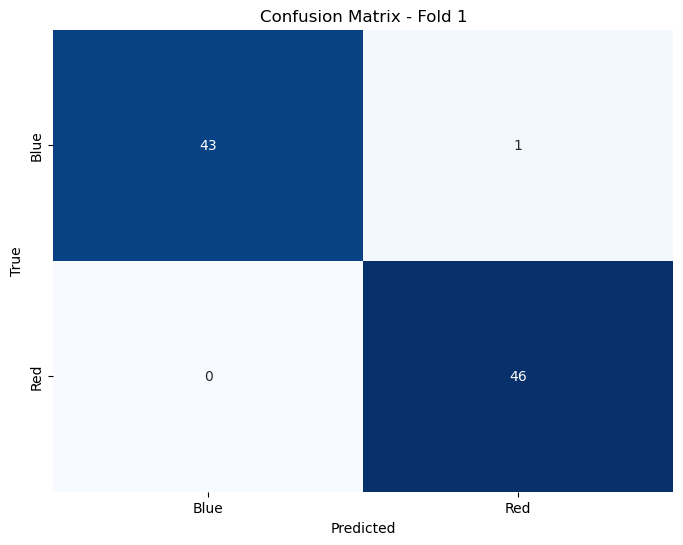

F1 Score - Fold 1: 0.989247311827957
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


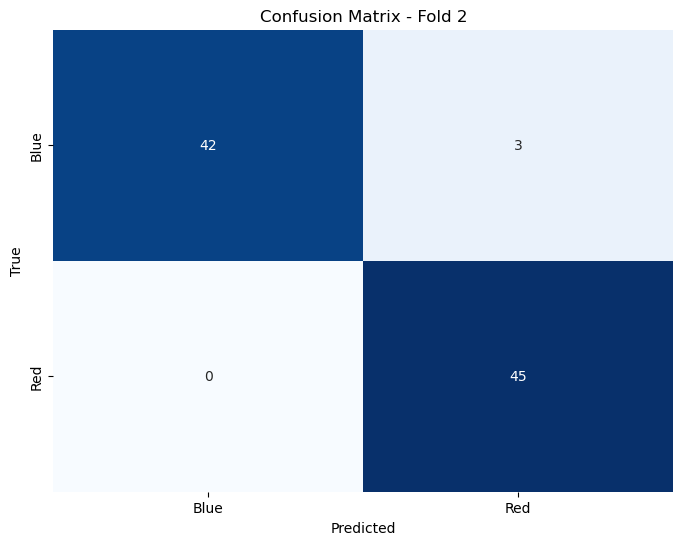

F1 Score - Fold 2: 0.967741935483871
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x1223bfbe0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


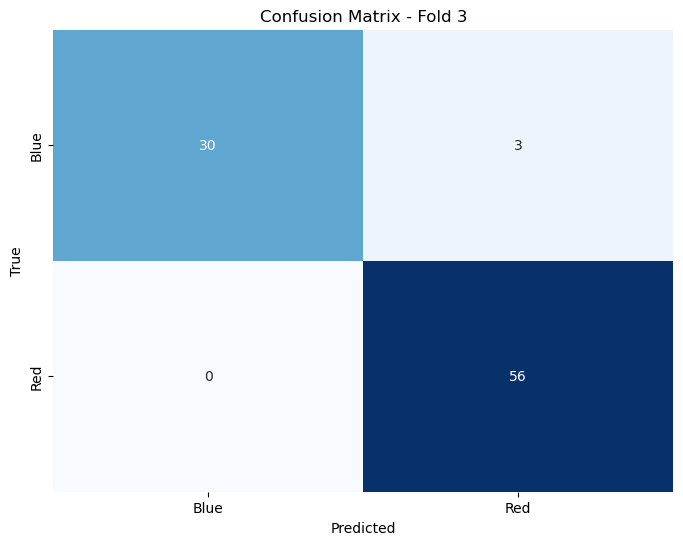

F1 Score - Fold 3: 0.9739130434782609


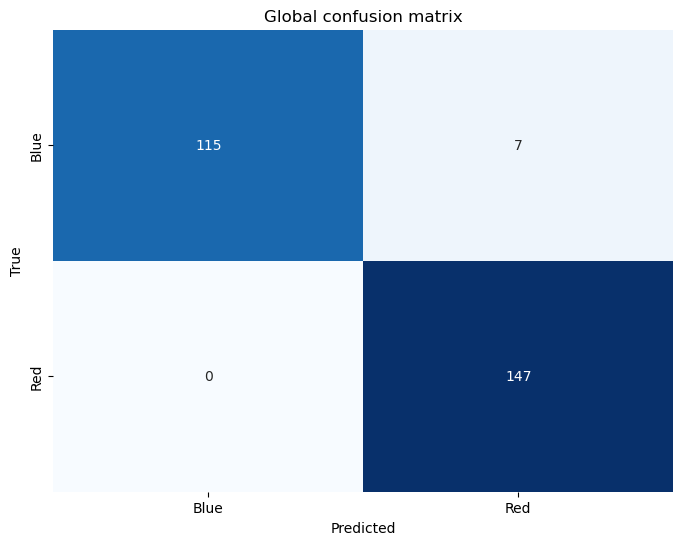

Mean F1 Score across all folds: 0.976967430263363


In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

def plot_confusion_matrix(confusion_matrix, title):
    # Plot confusion matrix
    pl.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix.astype(int), annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Blue", "Red"], yticklabels=["Blue", "Red"])
    pl.title(title)
    pl.xlabel('Predicted')
    pl.ylabel('True')
    pl.show()

f1_scores = []
mean_confusion_matrix = np.zeros((2, 2))

for i, (train_index, test_index) in enumerate(kf.split(input_data)):
    # Evaluate the trained model on the test fold
    predictions = (trained_mlp[i].predict(input_data[test_index]) > 0).astype(int)
    true_labels = (output_data[test_index] > 0).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    mean_confusion_matrix += confusion_matrix(true_labels, predictions)

    # Compute confusion matrix and plot
    plot_confusion_matrix(cm, f'Confusion Matrix - Fold {i + 1}')

    # Compute F1 score
    f1 = f1_score(true_labels, predictions)
    f1_scores.append(f1)
    print(f"F1 Score - Fold {i + 1}: {f1}")

# Plot mean confusion matrix
plot_confusion_matrix(mean_confusion_matrix, 'Global confusion matrix')

# Calculate and display the mean F1 score across all folds
mean_f1_score = np.mean(f1_scores)
print(f"Mean F1 Score across all folds: {mean_f1_score}")

# Exercise

Please try changing hyperparameters (number of neurons, number of layers, learning rate, momentum, number of epochs...) and observe the impact it has on training and validation loss, convergence, and computation time. For instance, observe if there's overfitting if you put a high number (i.e. 128) of neurons in the hidden layer.

Experiment with 3 Different Datasets:
Apply the above parameter tuning on three distinct types of datasets:
- Balanced dataset with clear separation between classes.
- Balanced dataset with mixed or overlapping classes.
- Unbalanced dataset (e.g., one class significantly larger than the others).

For each dataset type, select and present the three best experiments (with tuned hyperparameters). Provide relevant results such as confusion matrices and other metrics, and analyze the effects on loss, convergence, computation time, and overfitting.